In [ ]:
import sys
#sys.path.append("/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils")
from supervised import Evaluator
from supervised import get_test_dataset
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Prepare Datasets 
The supervised dataset is a collection of tweets that have been extracted according to their hashtag, in the first exmaple we have bitcoin, ukrainian war, formula1, trump and climatechange. The tweets are in a folder and each topic should be in a jsonl file with the name of the topic. The jsonl data have been ectracted using twarc2.

Then two version of the same dataset have been created, one with the original tweets and one with the tweets without the hashtags.

In [3]:
df_simple, df_simple_no_hash = get_test_dataset('/Users/alessiogandelli/dev/uni/topic-modeling-eval/data/simple_supervised/')
df_politics, df_politics_no_hash = get_test_dataset('/Users/alessiogandelli/dev/uni/topic-modeling-eval/data/politics_supervised/')


getting dataset
getting dataset


# Evaluators

The evaluator class has a self explanatory name, it is used to evaluate the results of the models. takes in input a dataframe and the name of the model to use to evaluate it. Internally it creates the model and run the evaluation. we can access the results using the accuracy attribute (gsdmm.accuracy for example)

## simple dataset

### with hashtags


In [ ]:
gsdmm = Evaluator(df_simple, 'GSDMM')
climatebert = Evaluator(df_simple, 'climatebert/distilroberta-base-climate-f')
tweetclass = Evaluator(df_simple, 'louisbetsch/tweetclassification-bf-model')
nmf = Evaluator(df_simple, 'NMF')
bert_mini = Evaluator(df_simple, 'all-MiniLM-L6-v2')
bert_mpnet = Evaluator(df_simple, 'all-mpnet-base-v2')
openai_eval = Evaluator(df_simple, 'openai')

### without hashtags

In [ ]:
#gsdmm = Evaluator(df_simple_no_hash, 'GSDMM')
# climatebert = Evaluator(df_simple_no_hash, 'climatebert/distilroberta-base-climate-f')
# tweetclass = Evaluator(df_simple_no_hash, 'louisbetsch/tweetclassification-bf-model')
nmf = Evaluator(df_simple_no_hash, 'NMF')
bert_mini = Evaluator(df_simple_no_hash, 'all-MiniLM-L6-v2')
bert_mpnet = Evaluator(df_simple_no_hash, 'all-mpnet-base-v2')
openai_eval = Evaluator(df_simple_no_hash, 'openai')


comparison between the dataset with hashtags and the dataset without hashtags using multiple models

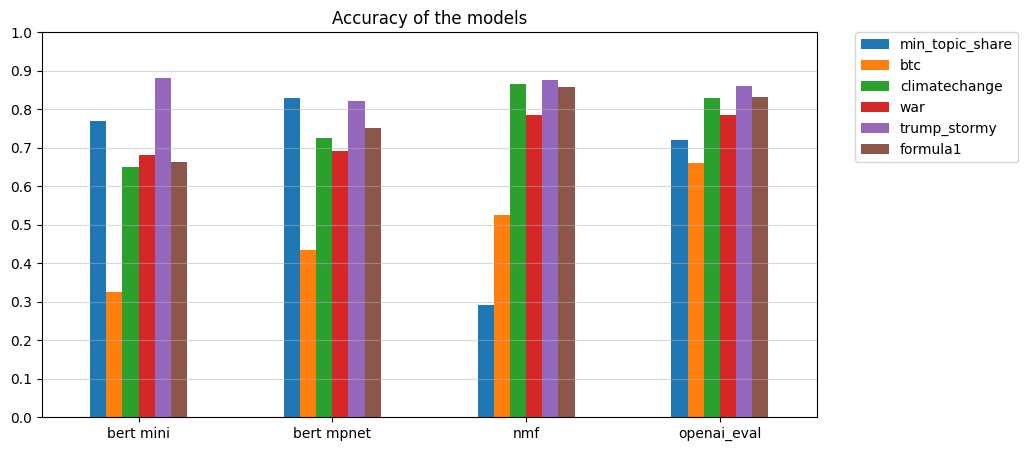

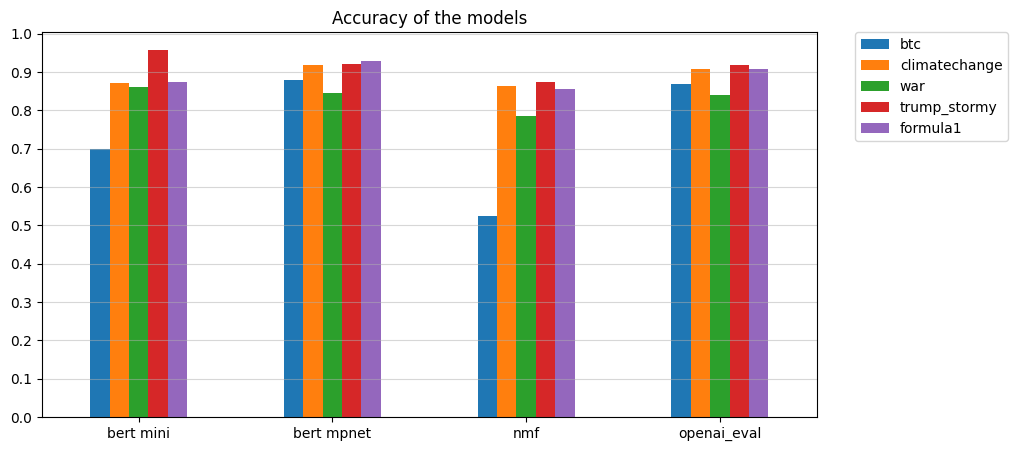

In [4]:
models = {'bert mini': bert_mini.accuracy[0]['accuracy'],'bert mpnet': bert_mpnet.accuracy[0]['accuracy'], 'nmf': nmf.accuracy[0]['accuracy'], 'openai_eval': openai_eval.accuracy[0]['accuracy']}
models_no_out = {'bert mini': bert_mini.accuracy[0]['accuracy_no_outliers'], 'bert mpnet': bert_mpnet.accuracy[0]['accuracy_no_outliers'], 'nmf': nmf.accuracy[0]['accuracy_no_outliers'], 'openai_eval': openai_eval.accuracy[0]['accuracy_no_outliers']}
                 
Evaluator.compare_models(models)
Evaluator.compare_models(models_no_out)
plt.title('Simple dataset')

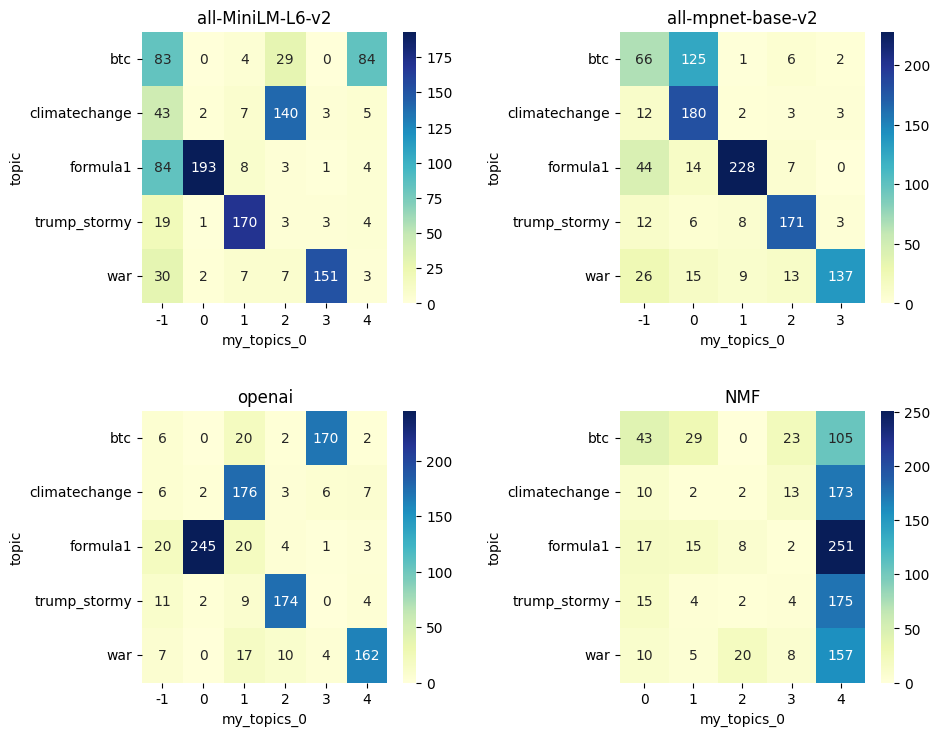

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

bert_mini.visualize_heatmap(ax= axs[0, 0])
bert_mpnet.visualize_heatmap(ax= axs[0, 1])
openai_eval.visualize_heatmap(ax= axs[1, 0])
nmf.visualize_heatmap(ax = axs[1, 1])

#add margin 
fig.tight_layout(pad=3.0)

plt.show()





In [10]:
openai_eval.visualize_documents()

In [11]:
bert_mpnet.visualize_documents()

## Political dataset

In [ ]:
nmf = Evaluator(df_politics, 'NMF')
bert_mini = Evaluator(df_politics, 'all-MiniLM-L6-v2')
bert_mpnet = Evaluator(df_politics, 'all-mpnet-base-v2')
openai_eval = Evaluator(df_politics, 'openai')


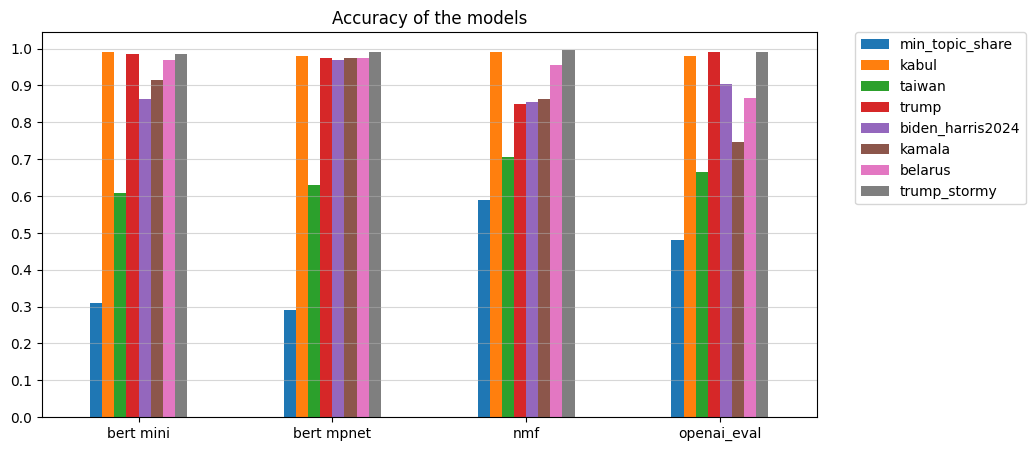

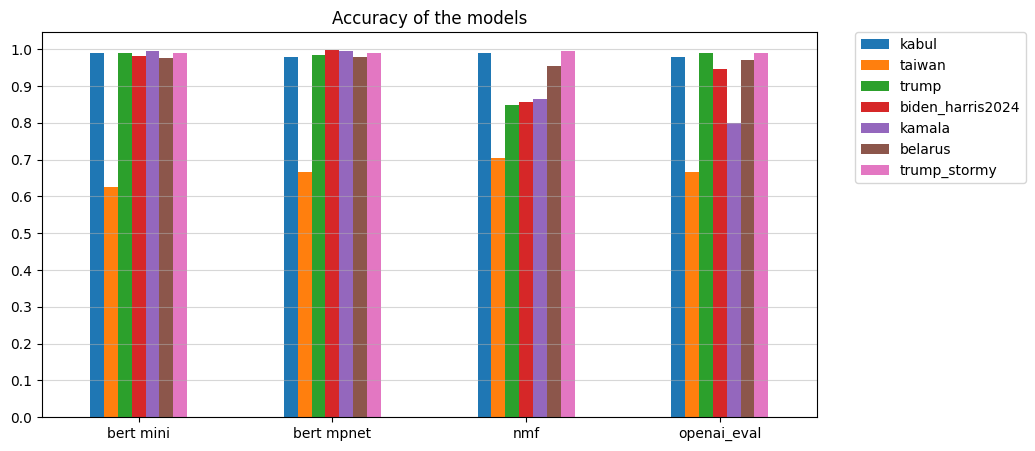

In [13]:
models = {'bert mini': bert_mini.accuracy[0]['accuracy'],'bert mpnet': bert_mpnet.accuracy[0]['accuracy'], 'nmf': nmf.accuracy[0]['accuracy'], 'openai_eval': openai_eval.accuracy[0]['accuracy']}
models_no_out = {'bert mini': bert_mini.accuracy[0]['accuracy_no_outliers'], 'bert mpnet': bert_mpnet.accuracy[0]['accuracy_no_outliers'], 'nmf': nmf.accuracy[0]['accuracy_no_outliers'], 'openai_eval': openai_eval.accuracy[0]['accuracy_no_outliers']}
                 
Evaluator.compare_models(models)
Evaluator.compare_models(models_no_out)

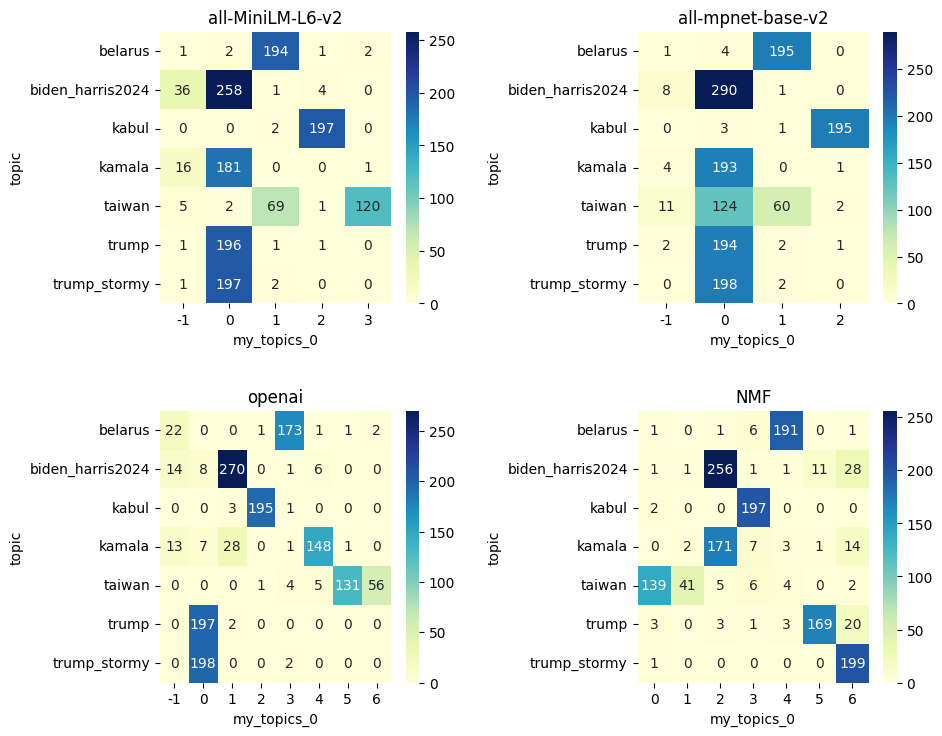

In [14]:


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

bert_mini.visualize_heatmap(ax= axs[0, 0])
bert_mpnet.visualize_heatmap(ax= axs[0, 1])
openai_eval.visualize_heatmap(ax= axs[1, 0])
nmf.visualize_heatmap(ax = axs[1, 1])

#add margin 
fig.tight_layout(pad=3.0)

plt.show()



## no hash 

In [15]:
nmf = Evaluator(df_politics_no_hash, 'NMF')
bert_mini = Evaluator(df_politics_no_hash, 'all-MiniLM-L6-v2')
bert_mpnet = Evaluator(df_politics_no_hash, 'all-mpnet-base-v2')
openai_eval = Evaluator(df_politics_no_hash, 'openai')



evaluate NMF
model  NMF
iteration  0
fitting NMF model, max_df =  0.95  min_df =  3  ngram_range =  (1, 2)
iteration  1
fitting NMF model, max_df =  0.95  min_df =  3  ngram_range =  (1, 2)
                                                                  text lang  \
1640380557442818056  🔴  Same poor Afghan kid after today’s  explosi...   en   
1640380163379671040   6 Killed, Several Injured In Suicide Attack In     en   
1640378515748003841  @Spencers_place @RickyDoggin Are you asking ab...   en   
1640376804987813892  ⚡️ Two Killed, Dozen Injured in  Bomb BlastThe...   en   
1640374299063205888  A suicide bomber below himself as he was ident...   en   
...                                                                ...  ...   
1638031875502473217  Genius  himself in the   Everyone’s talking… 😁...   en   
1638031119823294466  If a   gets away with not repoing a woman drow...   en   
1638027516416872449  @1JaySC Hell yea  Lock his diy self up. yes wh...   en   
1638027312410112002 

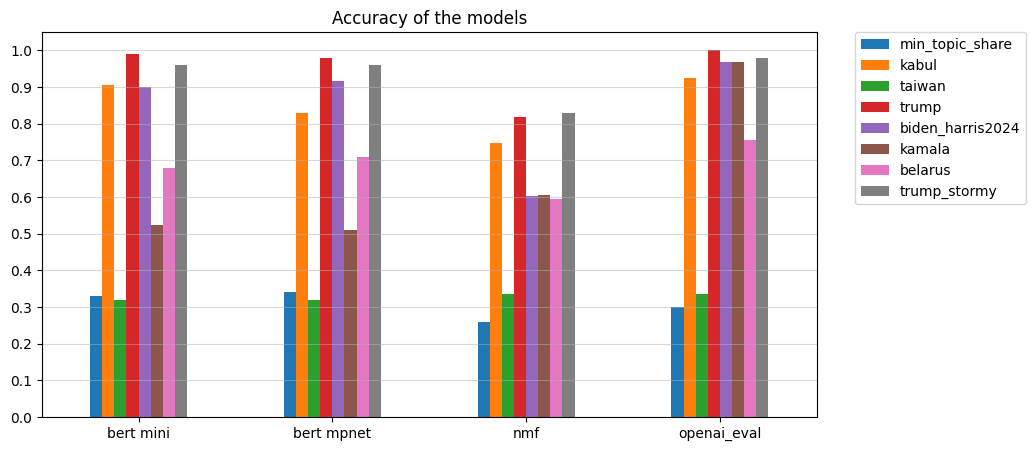

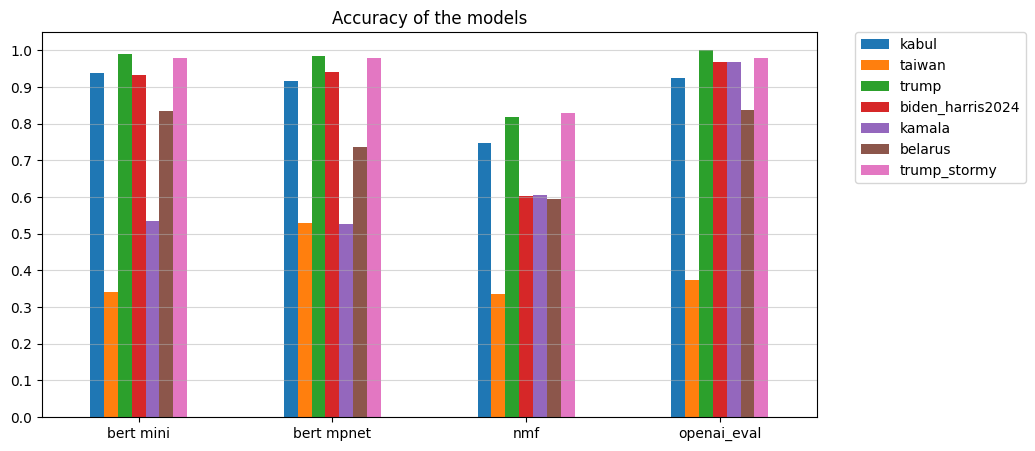

In [16]:
models = {'bert mini': bert_mini.accuracy[0]['accuracy'],'bert mpnet': bert_mpnet.accuracy[0]['accuracy'], 'nmf': nmf.accuracy[0]['accuracy'], 'openai_eval': openai_eval.accuracy[0]['accuracy']}
models_no_out = {'bert mini': bert_mini.accuracy[0]['accuracy_no_outliers'], 'bert mpnet': bert_mpnet.accuracy[0]['accuracy_no_outliers'], 'nmf': nmf.accuracy[0]['accuracy_no_outliers'], 'openai_eval': openai_eval.accuracy[0]['accuracy_no_outliers']}
                 
Evaluator.compare_models(models)
Evaluator.compare_models(models_no_out)

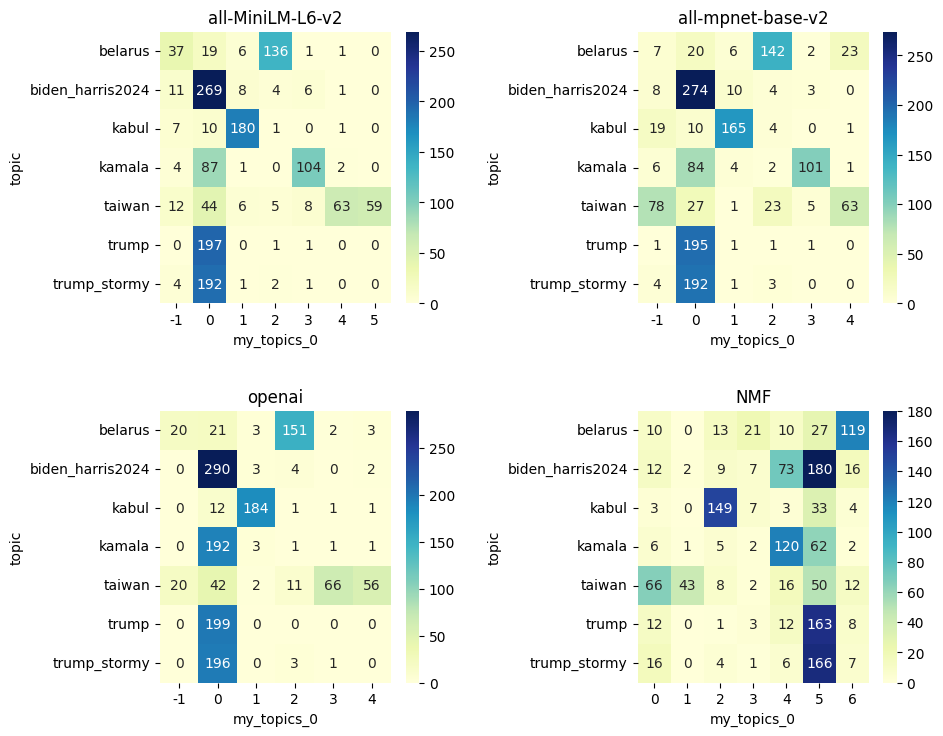

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

bert_mini.visualize_heatmap(ax= axs[0, 0])
bert_mpnet.visualize_heatmap(ax= axs[0, 1])
openai_eval.visualize_heatmap(ax= axs[1, 0])
nmf.visualize_heatmap(ax = axs[1, 1])

#add margin 
fig.tight_layout(pad=3.0)

plt.show()